In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Read the csv file
df1 = pd.read_csv(r'percentage_in_rooms_dataset.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   part_id                290 non-null    int64  
 1   Percentage_Bathroom    290 non-null    float64
 2   Percentage_Bedroom     290 non-null    float64
 3   Percentage_Kitchen     290 non-null    float64
 4   Percentage_Livingroom  290 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.5 KB


## **Merge two datasets (clinical and room_time_percentage) based on the part_id column**


In [13]:
#df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_In_Health/mariarevythi/clinical_dataset_corrected.csv')
df2 = pd.read_csv(r'clinical_dataset_corrected.csv')

print("Number of fields in the df2:", df2.shape[1])

# Merge the two datasets based on the part_id column
merged_df = pd.merge(df2, df1, on='part_id', how='inner')
print("Number of fields in the merged_df:", merged_df.shape[1])

#merged_df.info();
#merged_df.head(10)

Number of fields in the df2: 55
Number of fields in the merged_df: 59


# **Clustering**


In [16]:
# Exclude the fields you don't want to be included
excluded_fields = ['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower'
                   , 'grip_strength_abnormal', 'low_physical_activity']
selected_data = merged_df.drop(excluded_fields, axis=1)


## **K-Means Silhouette**


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply clustering algorithm (K-means in this example)
num_clusters = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(selected_data)

# Evaluate the clustering using Silhouette index
silhouette_avg = silhouette_score(selected_data, cluster_labels)

print("Silhouette index:", silhouette_avg)

e:\Users\Elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette index: 0.4100121104623478


## **PCA**


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Apply PCA on the scaled data
reduced_data = pca.fit_transform(scaled_data)

# Assuming you want to use K-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
cluster_labels = kmeans.fit_predict(reduced_data)

silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("Silhouette Index:", silhouette_avg)

e:\Users\Elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Index: 0.38484833723462203


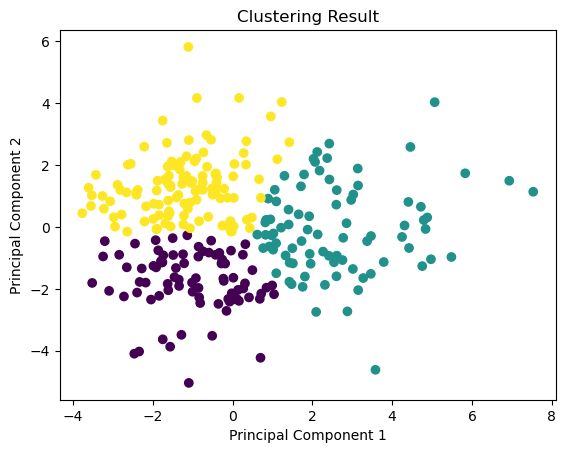

In [24]:
# Plotting the reduced data with cluster labels
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result')
plt.show()

e:\Users\Elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.612298675368648


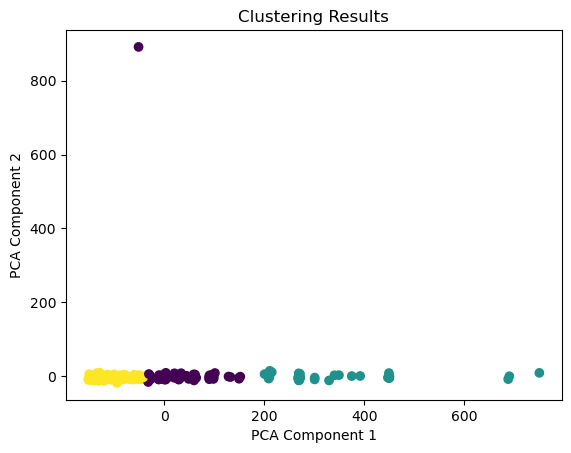

In [25]:

# Assuming X is your feature matrix without the 'fried' column
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Calculate Silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print("Silhouette Score:", silhouette_avg)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results')
plt.show()

